# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #.values create numpy array

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
#RNN will look back into the 60 timestamps and see the trend.
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# print(X_train)

### Reshaping

In [5]:
#input should be 3d Array.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense #output layer
from keras.layers import LSTM
from keras.layers import Dropout #for regularization.

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - loss: 0.0950
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0075
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0061
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0046
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0039
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0050
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0038
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0052
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0047
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0048
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
#scaling the inputs. Only inputs
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80): #only 20 financial days.
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
[[800.828  ]
 [797.9623 ]
 [798.08765]
 [799.6375 ]
 [803.22095]
 [809.3319 ]
 [814.94867]
 [817.19916]
 [817.25   ]
 [816.59   ]
 [816.0554 ]
 [815.7209 ]
 [815.60266]
 [816.2257 ]
 [817.2952 ]
 [821.95764]
 [829.07806]
 [836.73663]
 [840.85474]
 [836.524  ]]


### Visualising the results

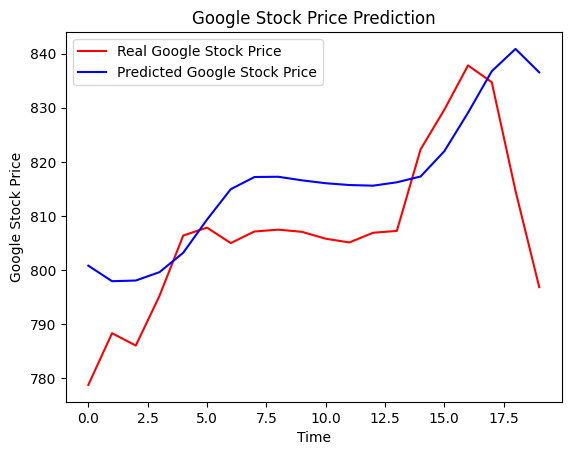

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()